# “Desarrollo de un sistema de reconocimiento de vocales en lengua de señas mediante visión por ordenador y Deep Learning"

### Integrantes
* Katty Ode Paton(katty.ode@gmail.com)
* Daniel Olivera (3daniel.olivera@gmail.com)
* Maria Lucero Yañez Guzman (lyanezguz@gmail.com)

## 1. Descripcion del Problema

Para abordar este problema, proponemos un proyecto de investigación y desarrollo que aprovecha las capacidades de visión artificial y la potencia de un modelo de Deep Learning
basado en una Red Neuronal Convolucional (CNN). El objetivo principal de este proyecto es
diseñar, implementar y evaluar un sistema de reconocimiento de vocales en lenguaje de señas
que permita una comunicación fluida entre las personas sordas y aquellas que no conocen el
lenguaje de señas.
El proyecto se enfrentará a diversos desafíos técnicos, como la detección precisa de gestos
de las manos y los dedos, la identificación de las formas específicas de las señales que
representan las vocales y la adaptación a diferentes estilos y dialectos de lenguaje de señas.
Además, se requerirá un conjunto de datos amplio y diverso para el entrenamiento del modelo,
lo que implica un esfuerzo significativo en la recopilación y etiquetado de datos.

## Indice



1.   Descripción del Problema
2.   Setup e Importacion de Librerias
3.   Carga de datos
4.   Preparación de los datos
5.   Muestra de las imagenes procesadas
6.   Creación del conjunto de Entrenamiento y Prueba
7.   Definición y estructura del Modelo
8.   Entrenamiento del Modelo
9.   Predicción del modelo
10.  Precisión del modelo
11.  Predicción importando imagenes para evaluar el modelo





## 2. Setup e Importacion de Librerias

Montar Google Drive para su uso

In [1]:
# Importa la biblioteca necesaria para montar Google Drive en Google Colab
from google.colab import drive
# Monta Google Drive en la ruta '/content/drive'
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential, save_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import random
import os
import string

## 3. Carga de datos

Carga de nuestro dataset de las carpetas con vocales A,E,I,O,U usando Google Drive

In [3]:
# Ruta completa a la carpeta principal de Google Drive
path = '/content/drive/My Drive/Dataset'

# Función recursiva para listar archivos y carpetas
def listar_contenido(carpeta_actual):
    contenido = os.listdir(carpeta_actual)
    for item in contenido:
        item_path = os.path.join(carpeta_actual, item)
        if os.path.isdir(item_path):
            # Si es una carpeta, llama recursivamente a la función
            print(f'Carpeta: {item_path}')
            listar_contenido(item_path)
        else:
            # Si es un archivo, muestra el nombre del archivo
            print(f'Archivo: {item_path}')

# Llama a la función para listar el contenido de la carpeta principal de forma recursiva
listar_contenido(path)

Streaming output truncated to the last 5000 lines.
Archivo: /content/drive/My Drive/Dataset/U/U2044.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2251.jpg
Archivo: /content/drive/My Drive/Dataset/U/U1879.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2078.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2555.jpg
Archivo: /content/drive/My Drive/Dataset/U/U1969.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2749.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2263.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2114.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2715.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2402.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2352.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2655.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2856.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2231.jpg
Archivo: /content/drive/My Drive/Dataset/U/U1961.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2218.jpg
Archivo: /content/drive/My Drive/Dataset/U/U2123

In [4]:
path = path + "/"
gestures = os.listdir(path)

In [5]:
print(gestures)

['A', 'I', 'O', 'U', 'E']


In [6]:
folders = ['A', 'E', 'I', 'O','U']

In [7]:
print(folders)

['A', 'E', 'I', 'O', 'U']


## 4. Preparación de los datos

Preparación, normalización y redimensión de las imagenes previamente cargadas

In [8]:
# Listas para almacenar imágenes, etiquetas y rutas de las imágenes
X, Y = [], []
image_paths = []

# Recorre las carpetas dentro de 'folders'
for folder in folders:
    # Obtiene la ruta completa de la carpeta actual
    folder_path = path + folder
    # Lista los archivos dentro de la carpeta
    images = os.listdir(folder_path)

     # Recorre los nombres de archivo dentro de la carpeta
    for image_filename in images:
        # Obtiene la ruta completa de la imagen actual
        image_path = os.path.join(folder_path, image_filename)
        # Lee la imagen con OpenCV
        img = cv2.imread(image_path)
        # Redimensiona la imagen a 50x50 píxeles
        img = cv2.resize(img, (50, 50))
        # Normaliza los valores de píxeles entre 0 y 1
        img = img / 255.0
        # Agrega la imagen procesada a la lista 'X'
        X.append(img)
        # Agrega la etiqueta de la carpeta actual a la lista 'Y'
        Y.append(folder)
        # Obtiene la ruta relativa de la imagen desde la carpeta principal
        relative_image_path = os.path.relpath(image_path, '/content/drive/My Drive/Dataset')
        # Agrega la ruta relativa a la lista de rutas de imágenes
        image_paths.append(relative_image_path)

# Convierte las listas a matrices numpy
X = np.array(X)
Y = np.array(Y)

In [9]:
print(X)

[[[[0.83137255 0.09411765 0.11372549]
   [0.63921569 0.18039216 0.20392157]
   [0.63921569 0.17254902 0.18823529]
   ...
   [0.6627451  0.18823529 0.22745098]
   [0.7254902  0.23137255 0.25490196]
   [0.84705882 0.25882353 0.27843137]]

  [[0.76470588 0.3372549  0.33333333]
   [0.54901961 0.6745098  0.72156863]
   [0.5254902  0.68235294 0.7254902 ]
   ...
   [0.38431373 0.4627451  0.54509804]
   [0.41568627 0.48235294 0.57254902]
   [0.57254902 0.43529412 0.50196078]]

  [[0.6745098  0.17647059 0.16078431]
   [0.34117647 0.36470588 0.31764706]
   [0.36470588 0.35686275 0.35294118]
   ...
   [0.27843137 0.37254902 0.44705882]
   [0.29411765 0.38039216 0.48235294]
   [0.52941176 0.38431373 0.46666667]]

  ...

  [[0.63921569 0.15294118 0.14901961]
   [0.29019608 0.32156863 0.31764706]
   [0.29803922 0.3254902  0.30980392]
   ...
   [0.52156863 0.57254902 0.60392157]
   [0.53333333 0.56862745 0.60392157]
   [0.71372549 0.55294118 0.57254902]]

  [[0.65490196 0.16862745 0.14509804]
   [0.3

In [10]:
Y

array(['A', 'A', 'A', ..., 'U', 'U', 'U'], dtype='<U1')

## 5. Muestra de las imagenes procesadas

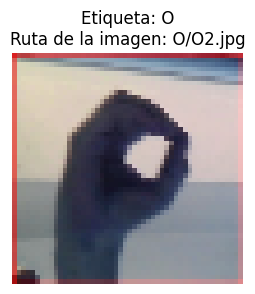

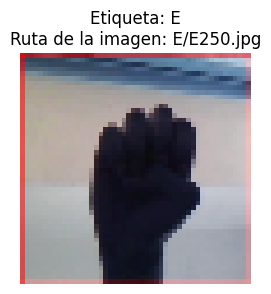

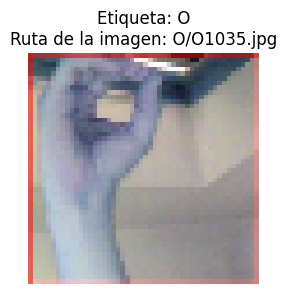

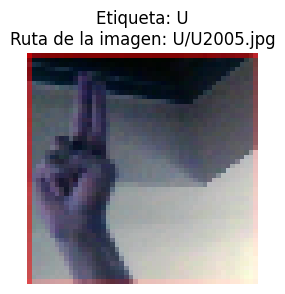

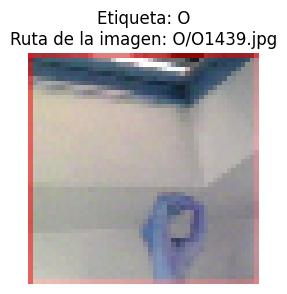

In [11]:
# Muestra 5 imágenes al azar junto con sus etiquetas y rutas de imagen
random_indices = random.sample(range(len(X)), 5)
for i in random_indices:
    plt.figure(figsize=(3, 3))
    plt.imshow(X[i])
   # plt.imshow(X[i], cmap=plt.cm.binary)
    plt.title(f'Etiqueta: {Y[i]}\nRuta de la imagen: {image_paths[i]}')
    plt.axis('off')
    plt.show()

In [12]:
#Crear un Diccionario para que las vocales se conviertan en ints
vocals = []
vocalsdic = {'A': 0, 'E':1,'I':2, 'O':3,'U':4}
for vocal in Y:
  vocals.append(vocalsdic[vocal])

In [13]:
#Convertir las etiquetas de las vocales a variable categoricas
Y = to_categorical(vocals)
X, Y = shuffle(X, Y, random_state=1010)
categories = Y.shape[1]

In [14]:
Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

## 6. Creación del conjunto de Entrenamiento y Prueba

In [15]:
print("Forma de X:", X.shape)
print("Forma de Y:", Y.shape)

Forma de X: (15159, 50, 50, 3)
Forma de Y: (15159, 5)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [17]:
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (11369, 50, 50, 3)
Forma de X_test: (3790, 50, 50, 3)
Forma de y_train: (11369, 5)
Forma de y_test: (3790, 5)


## 7. Definición y estructura del Modelo

In [18]:
#Definir la arquitectura del modelo
modelo = Sequential()
# Agrega una capa convolucional con 32 filtros de 3x3 y función de activación ReLU
# La capa espera entradas de forma (50, 50, 3) ya que las imágenes tienen 50x50 píxeles en 3 canales (RGB)
modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
# Agrega una capa de MaxPooling para reducir la dimensionalidad espacial
modelo.add(MaxPooling2D((2, 2)))
# Agrega otra capa convolucional con 64 filtros de 3x3 y función de activación ReLU
modelo.add(Conv2D(64, (3, 3), activation='relu'))
# Agrega otra capa de MaxPooling para reducir la dimensionalidad espacial nuevamente
modelo.add(MaxPooling2D((2, 2)))
# Agrega una tercera capa convolucional con 64 filtros de 3x3 y función de activación ReLU
modelo.add(Conv2D(64, (3, 3), activation='relu'))
# Aplana la salida de las capas convolucionales en un vector unidimensional
modelo.add(Flatten())
# Agrega una capa completamente conectada (fully connected) con 64 unidades y función de activación ReLU
modelo.add(Dense(64, activation='relu'))
# Agrega la capa de salida con 5 unidades y función de activación softmax para las clases A, E, I, O, U
modelo.add(Dense(5, activation='softmax'))
# Muestra un resumen de la arquitectura del modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 5184)              0

In [19]:
# Compilar el modelo
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])


## 8. Entrenamiento del Modelo

In [20]:
# Entrenamiento del modelo con el conjunto de datos de entrenamiento
fit= modelo.fit(X_train, y_train,
           epochs=5,
           validation_data=(X_test, y_test))


Epoch 1/5
356/356 [==============================] - 54s 148ms/step - loss: 0.7292 - accuracy: 0.6958 - val_loss: 0.2252 - val_accuracy: 0.9164
Epoch 2/5
356/356 [==============================] - 51s 144ms/step - loss: 0.1311 - accuracy: 0.9545 - val_loss: 0.0385 - val_accuracy: 0.9923
Epoch 3/5
356/356 [==============================] - 58s 164ms/step - loss: 0.0570 - accuracy: 0.9815 - val_loss: 0.0297 - val_accuracy: 0.9913
Epoch 4/5
356/356 [==============================] - 48s 134ms/step - loss: 0.0201 - accuracy: 0.9945 - val_loss: 0.0140 - val_accuracy: 0.9958
Epoch 5/5
356/356 [==============================] - 52s 146ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0806 - val_accuracy: 0.9747


In [21]:
 #Evaluar el modelo en el conjunto de prueba
resultado = modelo.evaluate(X_test, y_test)

# Guardar el modelo entrenado en un archivo
modelo.save('modelo_vocales.h5')

119/119 [==============================] - 4s 31ms/step - loss: 0.0806 - accuracy: 0.9747


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 9. Predicción del modelo

In [22]:
#Prediccion del modelo
y_pred = modelo.predict(X_test)
y_pred

119/119 [==============================] - 4s 31ms/step


array([[5.37484419e-03, 6.40249811e-04, 1.03624021e-04, 9.89831865e-01,
        4.04927321e-03],
       [5.31677413e-09, 3.32292871e-07, 5.29663924e-10, 2.61977939e-12,
        9.99999583e-01],
       [1.18617552e-15, 1.73500138e-11, 1.54728994e-10, 4.58966666e-15,
        9.99999940e-01],
       ...,
       [1.08324355e-04, 9.72477428e-05, 5.60423769e-06, 1.57034881e-02,
        9.84085321e-01],
       [2.50140474e-05, 1.05556655e-05, 1.65744723e-06, 2.22975970e-03,
        9.97732997e-01],
       [9.99999046e-01, 9.74739237e-07, 8.50149284e-09, 3.22692735e-08,
        5.47254811e-11]], dtype=float32)

## 10. Precisión del modelo

In [23]:
#Acurracy del modelo
accuracy = modelo.evaluate(X_test,y_test,batch_size=138)
print("Accuracy: ",accuracy[1]*100)

28/28 [==============================] - 6s 201ms/step - loss: 0.0806 - accuracy: 0.9747
Accuracy:  97.46701717376709


In [24]:
print(classification_report(y_pred.round(), y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       787
           1       0.97      0.94      0.96       821
           2       0.96      1.00      0.98       713
           3       0.97      1.00      0.98       712
           4       0.98      1.00      0.99       736

   micro avg       0.97      0.98      0.97      3769
   macro avg       0.97      0.98      0.97      3769
weighted avg       0.97      0.98      0.97      3769
 samples avg       0.97      0.97      0.97      3769



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gráfica del Accuracy

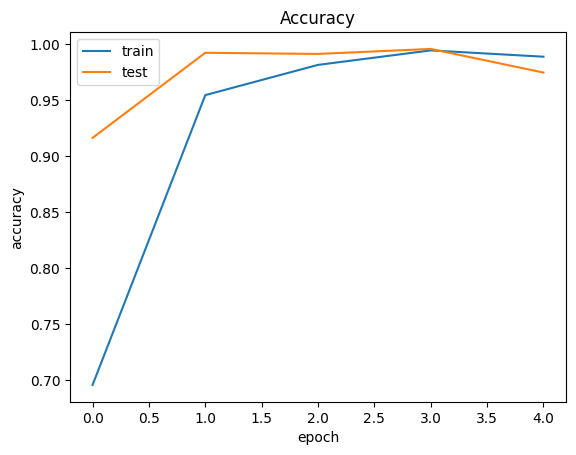

In [25]:
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

Gráfica del Loss

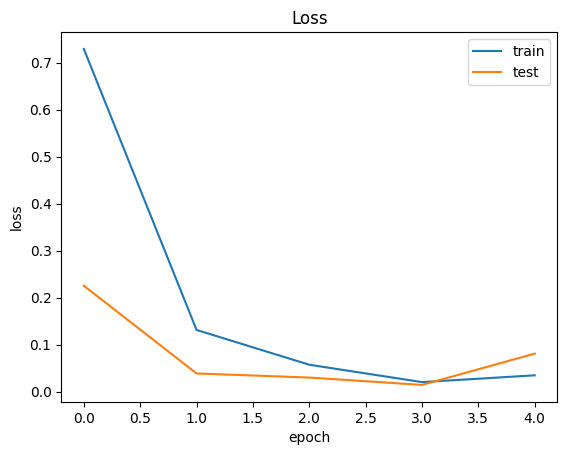

In [26]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

## 11. Predicción importando imagenes para evaluar el modelo

11.1 **Cargar la imagen de entrada:** Permite al usuario cargar una imagen en Colab desde su máquina local.

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

uploaded = files.upload()
imagen_path = list(uploaded.keys())[0]  # Obtiene el nombre del archivo de la imagen cargada.

11.2 Muestra de la imagen recien cargada para una mejor visualización de la misma

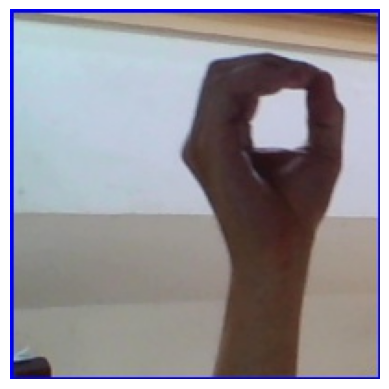

In [67]:
imgenShow = Image.open(imagen_path)
plt.imshow(imgenShow)
plt.axis('off')
plt.show()

11.3 **Preprocesamiento de la imagen de entrada**: Con el fin de predecir imagenes basandonos en el modelo es importante aseguranos de que la imagen recien cargada tenga el mismo formato que las imágenes de entrenamiento utilizadas para entrenar el modelo. Esto generalmente incluye el redimensionamiento de la imagen y la normalización.

In [68]:
imagen = Image.open(imagen_path)  # Abre la imagen cargada.
imagen = imagen.resize((50, 50))  # Redimensiona la imagen al tamaño esperado.
imagen = np.array(imagen)  # Convierte la imagen a una matriz NumPy.
imagen = imagen / 255.0  # Normaliza los valores de píxeles al rango [0, 1] (si es necesario).
imagen = imagen.reshape(-1, 50, 50, 3)  # Ajusta la forma de entrada del modelo.

11. 4 **Realizar la predicción:** Debido a que anteriormente las vocales fueron convertidas a variables categoricas, volvemos a asignar estos valores a las vocales A,E,I,O,U, luego se procede a realizar la predicciön de la imagen:

In [69]:
prediccion = modelo.predict(imagen)

# Mapear las clases a las vocales.
class_to_vowel = {0: 'A', 1: 'E', 2: 'I', 3: 'O', 4: 'U'}

# Obtener la vocal predicha.
clase_predicha = np.argmax(prediccion)
vocal_predicha = class_to_vowel[clase_predicha]

print(prediccion)
print(f'La vocal predicha es: {vocal_predicha}')


1/1 [==============================] - 0s 26ms/step
[[2.1357517e-13 3.6120952e-12 8.0945189e-10 1.0000000e+00 9.3255868e-14]]
La vocal predicha es: O
